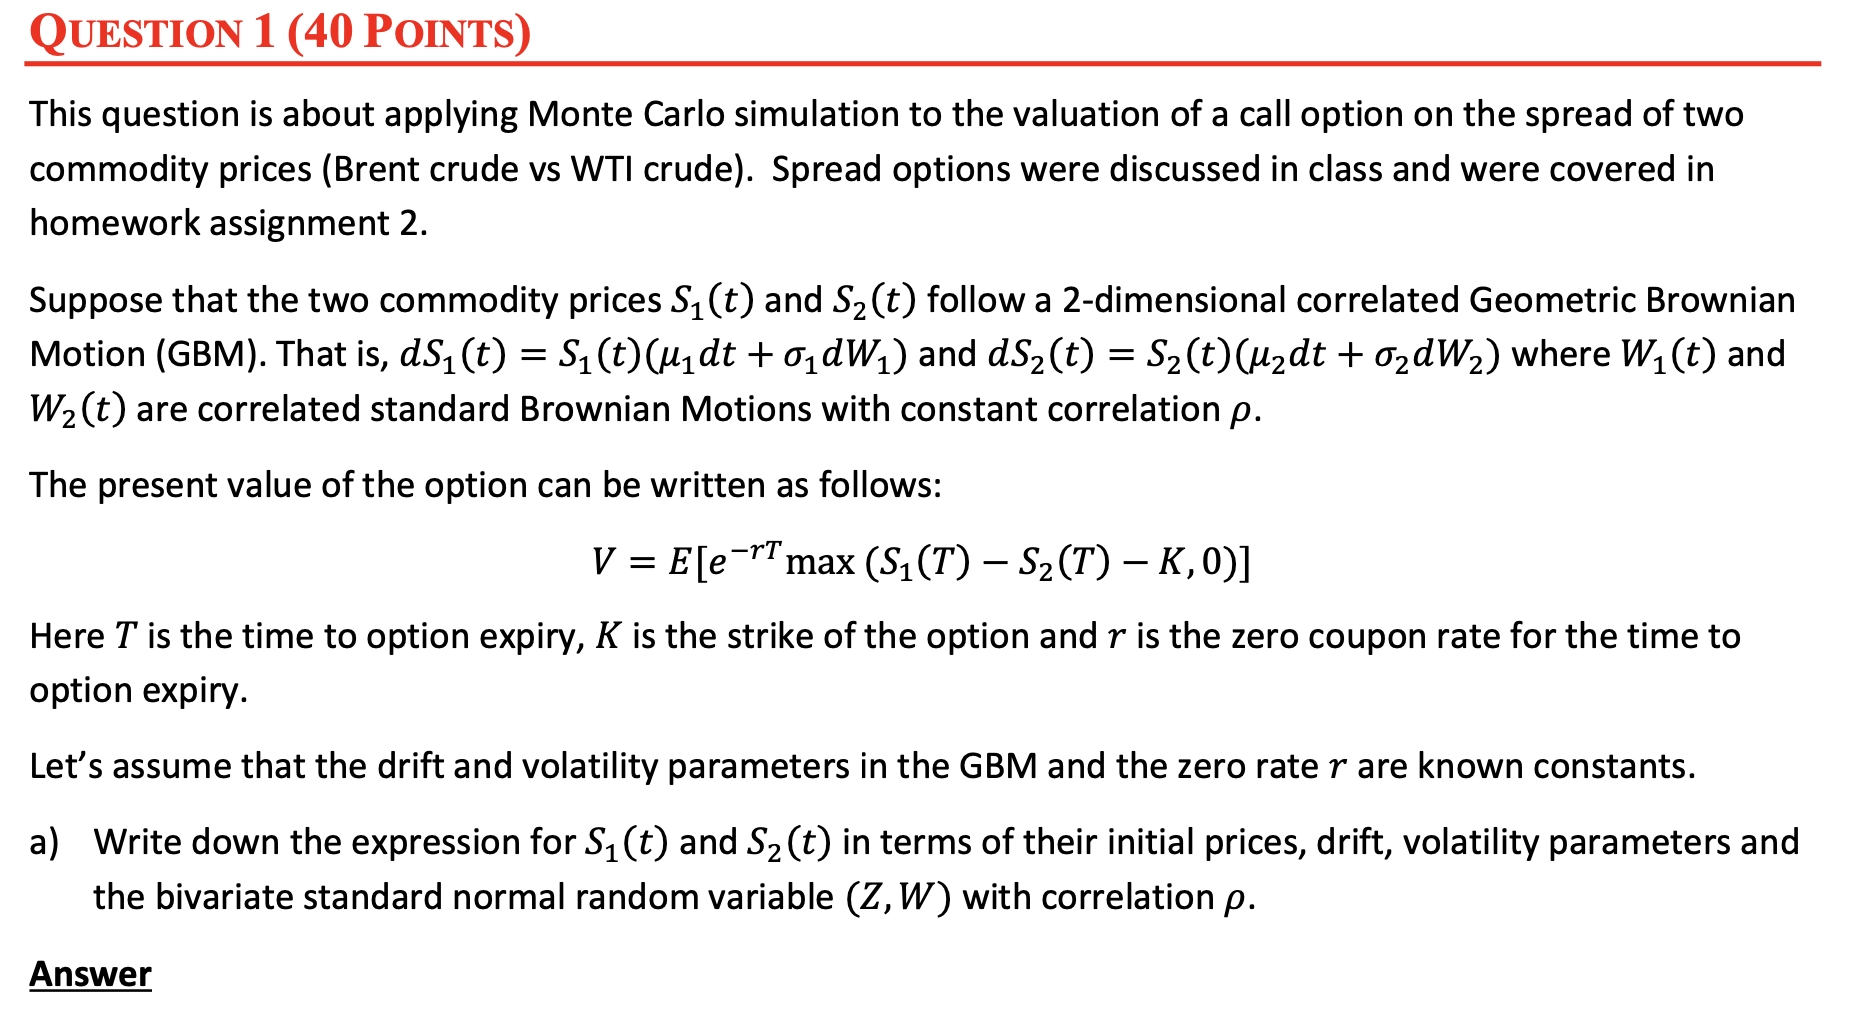

$$S_1(t) = S_1(0)exp\left(\left(\mu_1-\frac{\sigma_1^2}{2}\right)t+\sigma_1\sqrt{t}Z\right)$$
$$S_2(t) = S_2(0)exp\left(\left(\mu_2-\frac{\sigma_2^2}{2}\right)t+\sigma_2\sqrt{t}W\right)$$

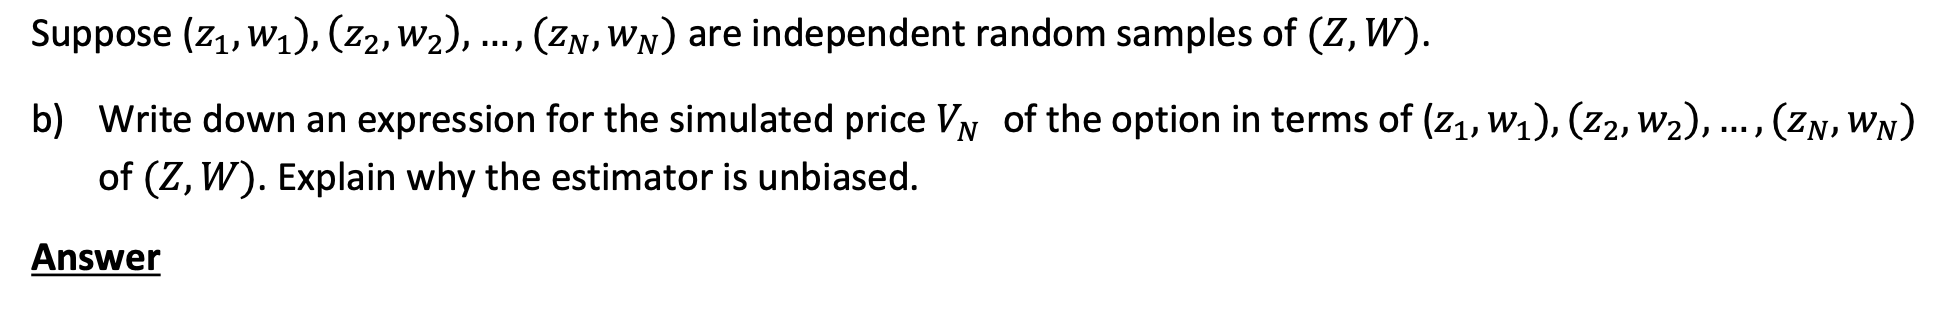

$$V_N = \frac{1}{N}\sum_{i=1}^Ne^{-rT}max \left(S_2(0)exp\left(\left(\mu_2-\frac{\sigma_2^2}{2}\right)t+\sigma_2\sqrt{t}w_i\right)-S_1(0)exp\left(\left(\mu_1-\frac{\sigma_1^2}{2}\right)t+\sigma_1\sqrt{t}z_i\right)-K,0\right)$$

Here, we can also say...

$$V_N = \frac{1}{N}\sum_{i=1}^Ng(z_i,w_i)$$

We know that...

$$\mathbb{E}[V_N] = \frac{1}{N}\sum_{i=1}^N\mathbb{E}\left[e^{-rT}max \left(S_2(0)exp\left(\left(\mu_2-\frac{\sigma_2^2}{2}\right)t+\sigma_2\sqrt{t}w_i\right)-S_1(0)exp\left(\left(\mu_1-\frac{\sigma_1^2}{2}\right)t+\sigma_1\sqrt{t}z_i\right)-K,0\right)\right]$$

$$ = \frac{1}{N}NV = V$$

, Hence Proved unbiased.

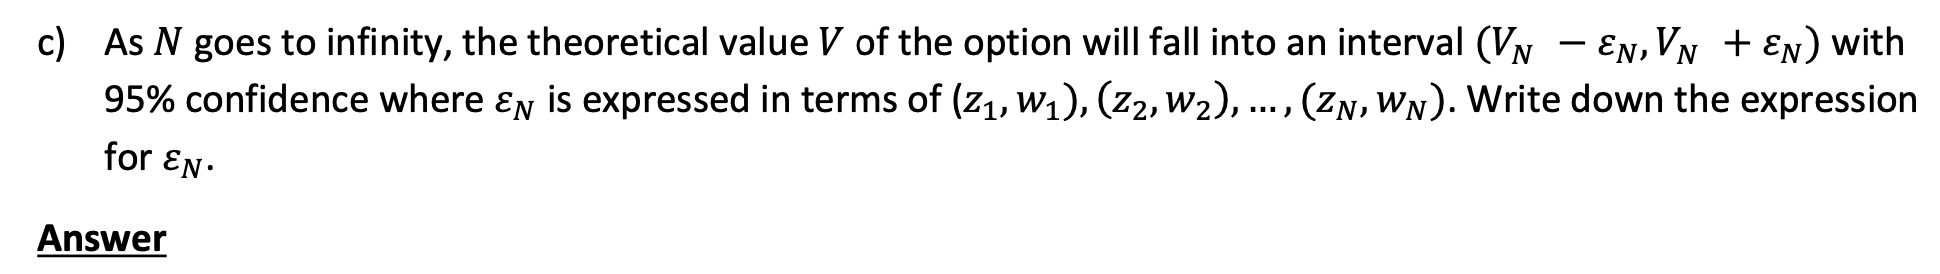

$$\epsilon_N = \frac{1.96s_N}{\sqrt{N}}$$

, here $$s_N = \left(\frac{1}{N-1} \sum_{i=1}^{N}\left[g(z_i,w_i)-\left(\frac{1}{N}\sum_{i=1}^{N}g(z_i,w_i)\right)\right]^2\right)^{1/2}$$ 

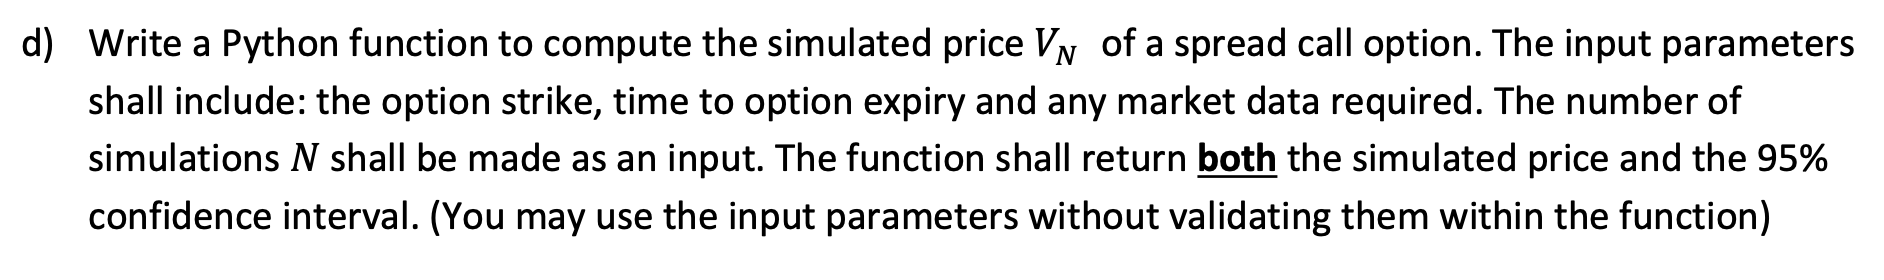

In [14]:
import numpy as np
import pandas as pd
import math

In [15]:
def spread_option_price1(S1_0, S2_0, r, mu1, mu2, v1, v2, corr, K, T, n):
    mean = np.zeros(shape=2)
    cov = [[1.0, corr], [corr, 1.0]]
    z, w = np.random.multivariate_normal(mean, cov, n).transpose()
    S1 = S1_0*np.exp((mu1-0.5*v1**2)*T+v1*np.sqrt(T)*z)
    S2 = S2_0*np.exp((mu2-0.5*v2**2)*T+v2*np.sqrt(T)*w)
    disc_payoffs = np.exp(-r*T)*np.maximum(S1-S2-K,0)
    price = np.mean(disc_payoffs)
    epsilon = 1.96*np.std(disc_payoffs, ddof = 1)/np.sqrt(n)
    return price, [price - epsilon, price + epsilon]

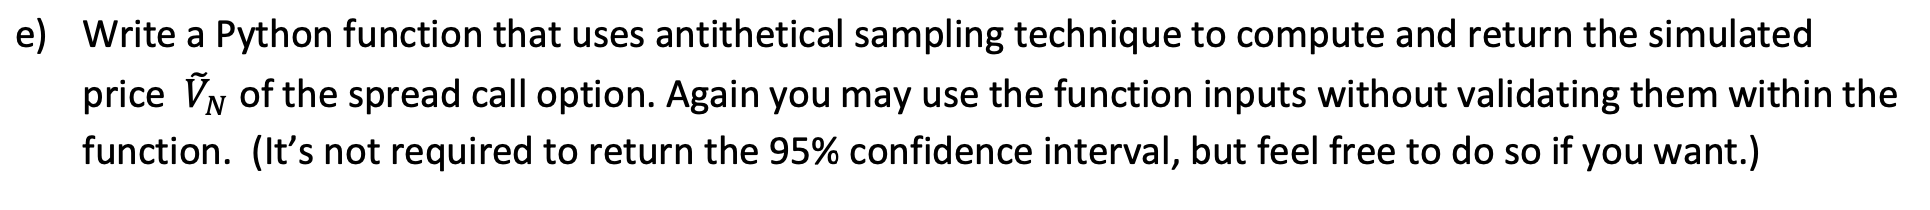

In [16]:
def spread_option_price2(S1_0, S2_0, r, mu1, mu2, v1, v2, corr, K, T, n):
    mean = np.zeros(shape=2)
    cov = [[1.0, corr], [corr, 1.0]]
    z, w = np.random.multivariate_normal(mean, cov, n).transpose()
    S11 = S1_0*np.exp((mu1-0.5*v1**2)*T+v1*np.sqrt(T)*z)
    S12 = S1_0*np.exp((mu1-0.5*v1**2)*T+v1*np.sqrt(T)*(-z))
    S21 = S2_0*np.exp((mu2-0.5*v2**2)*T+v2*np.sqrt(T)*w)
    S22 = S2_0*np.exp((mu2-0.5*v2**2)*T+v2*np.sqrt(T)*(-w))
    disc_payoffs = np.exp(-r*T)*0.5*(np.maximum(S11-S21-K,0) + np.maximum(S12-S22-K,0))
    price = np.mean(disc_payoffs)
    epsilon = 1.96*np.std(disc_payoffs, ddof = 1)/np.sqrt(n)
    return price, [price - epsilon, price + epsilon]

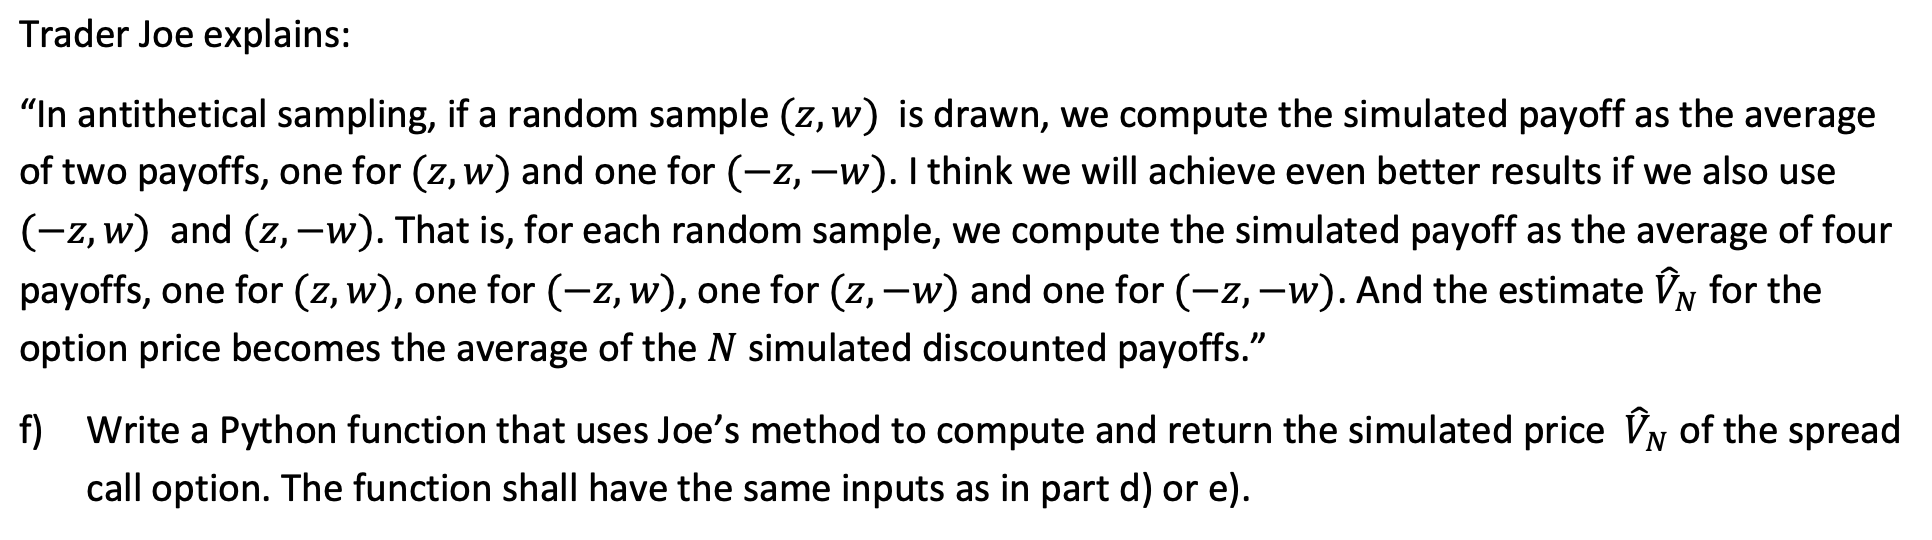

In [17]:
def spread_option_price3(S1_0, S2_0, r, mu1, mu2, v1, v2, corr, K, T, n):
    mean = np.zeros(shape=2)
    cov = [[1.0, corr], [corr, 1.0]]
    z, w = np.random.multivariate_normal(mean, cov, n).transpose()
    S11 = S1_0*np.exp((mu1-0.5*v1**2)*T+v1*np.sqrt(T)*z)
    S12 = S1_0*np.exp((mu1-0.5*v1**2)*T+v1*np.sqrt(T)*(-z))
    S21 = S2_0*np.exp((mu2-0.5*v2**2)*T+v2*np.sqrt(T)*w)
    S22 = S2_0*np.exp((mu2-0.5*v2**2)*T+v2*np.sqrt(T)*(-w))
    disc_payoffs = np.exp(-r*T)*0.25*(np.maximum(S11-S21-K,0)
                                  + np.maximum(S11-S22-K,0)
                                  + np.maximum(S12-S21-K,0)
                                  + np.maximum(S12-S22-K,0))
    price = np.mean(disc_payoffs)
    epsilon = 1.96*np.std(disc_payoffs, ddof = 1)/np.sqrt(n)
    return price, [price - epsilon, price + epsilon]

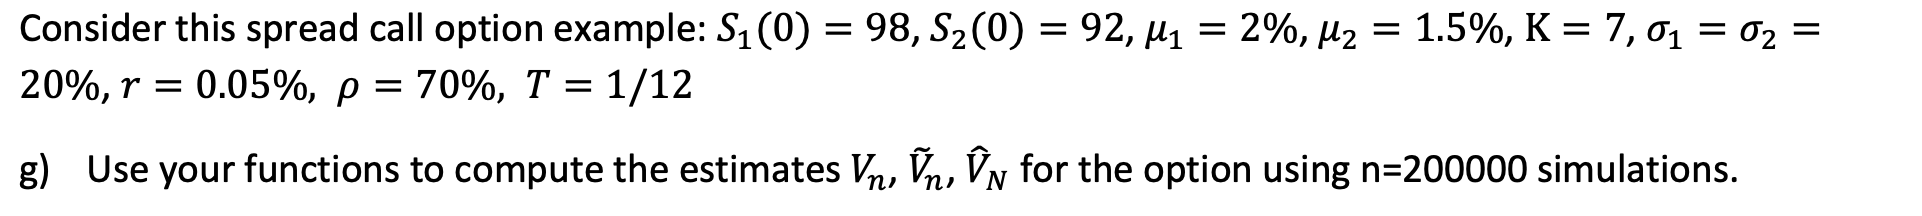

In [18]:
S1_0, S2_0, r, mu1, mu2, v1, v2, corr, K, T = 98, 92, 0.05/100, 0.02, 0.015, 0.2, 0.2, 0.7, 7, 1/12
n = 200000
print("Spread Option Price from part (d)", spread_option_price1(S1_0, S2_0, r, mu1, mu2, v1, v2, corr, K, T, n))
print("Spread Option Price from part (e)", spread_option_price2(S1_0, S2_0, r, mu1, mu2, v1, v2, corr, K, T, n))
print("Spread Option Price from part (f)", spread_option_price3(S1_0, S2_0, r, mu1, mu2, v1, v2, corr, K, T, n))

Spread Option Price from part (d) (1.269299821496182, [1.2597287153387675, 1.2788709276535963])
Spread Option Price from part (e) (1.2662454550742581, [1.2607411644091089, 1.2717497457394074])
Spread Option Price from part (f) (2.430126634198551, [2.422859531585739, 2.437393736811363])


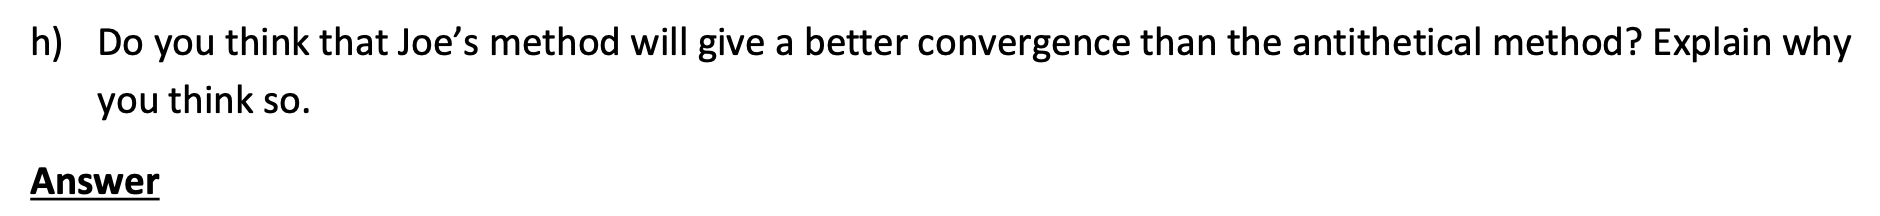

No, I don't think Joe's method would work unless $\rho = 0$, because $\widehat{V_N}$ is a biased estimator of $V$.

$corr(-Z,W) = corr(Z,-W) = -\rho$ and $corr(Z,W) = corr(-Z,-W) = \rho$

Case 1: $\rho = 0$

$E[g(Z,W)] = E[g(-Z,W)] = E[g(Z,-W)] = E[g(-Z,-W)]$ and thus, $E[\widehat{V_N}] = V$

Case 2: $\rho \neq 0$

$E[g(-Z,W)] = E[g(Z,-W)]$ and $E[g(Z,W)] = E[g(-Z,-W)]$, but $E[g(Z,W)] \neq E[g(-Z,W)]$ in general and thus, $E[\widehat{V_N}] \neq V$

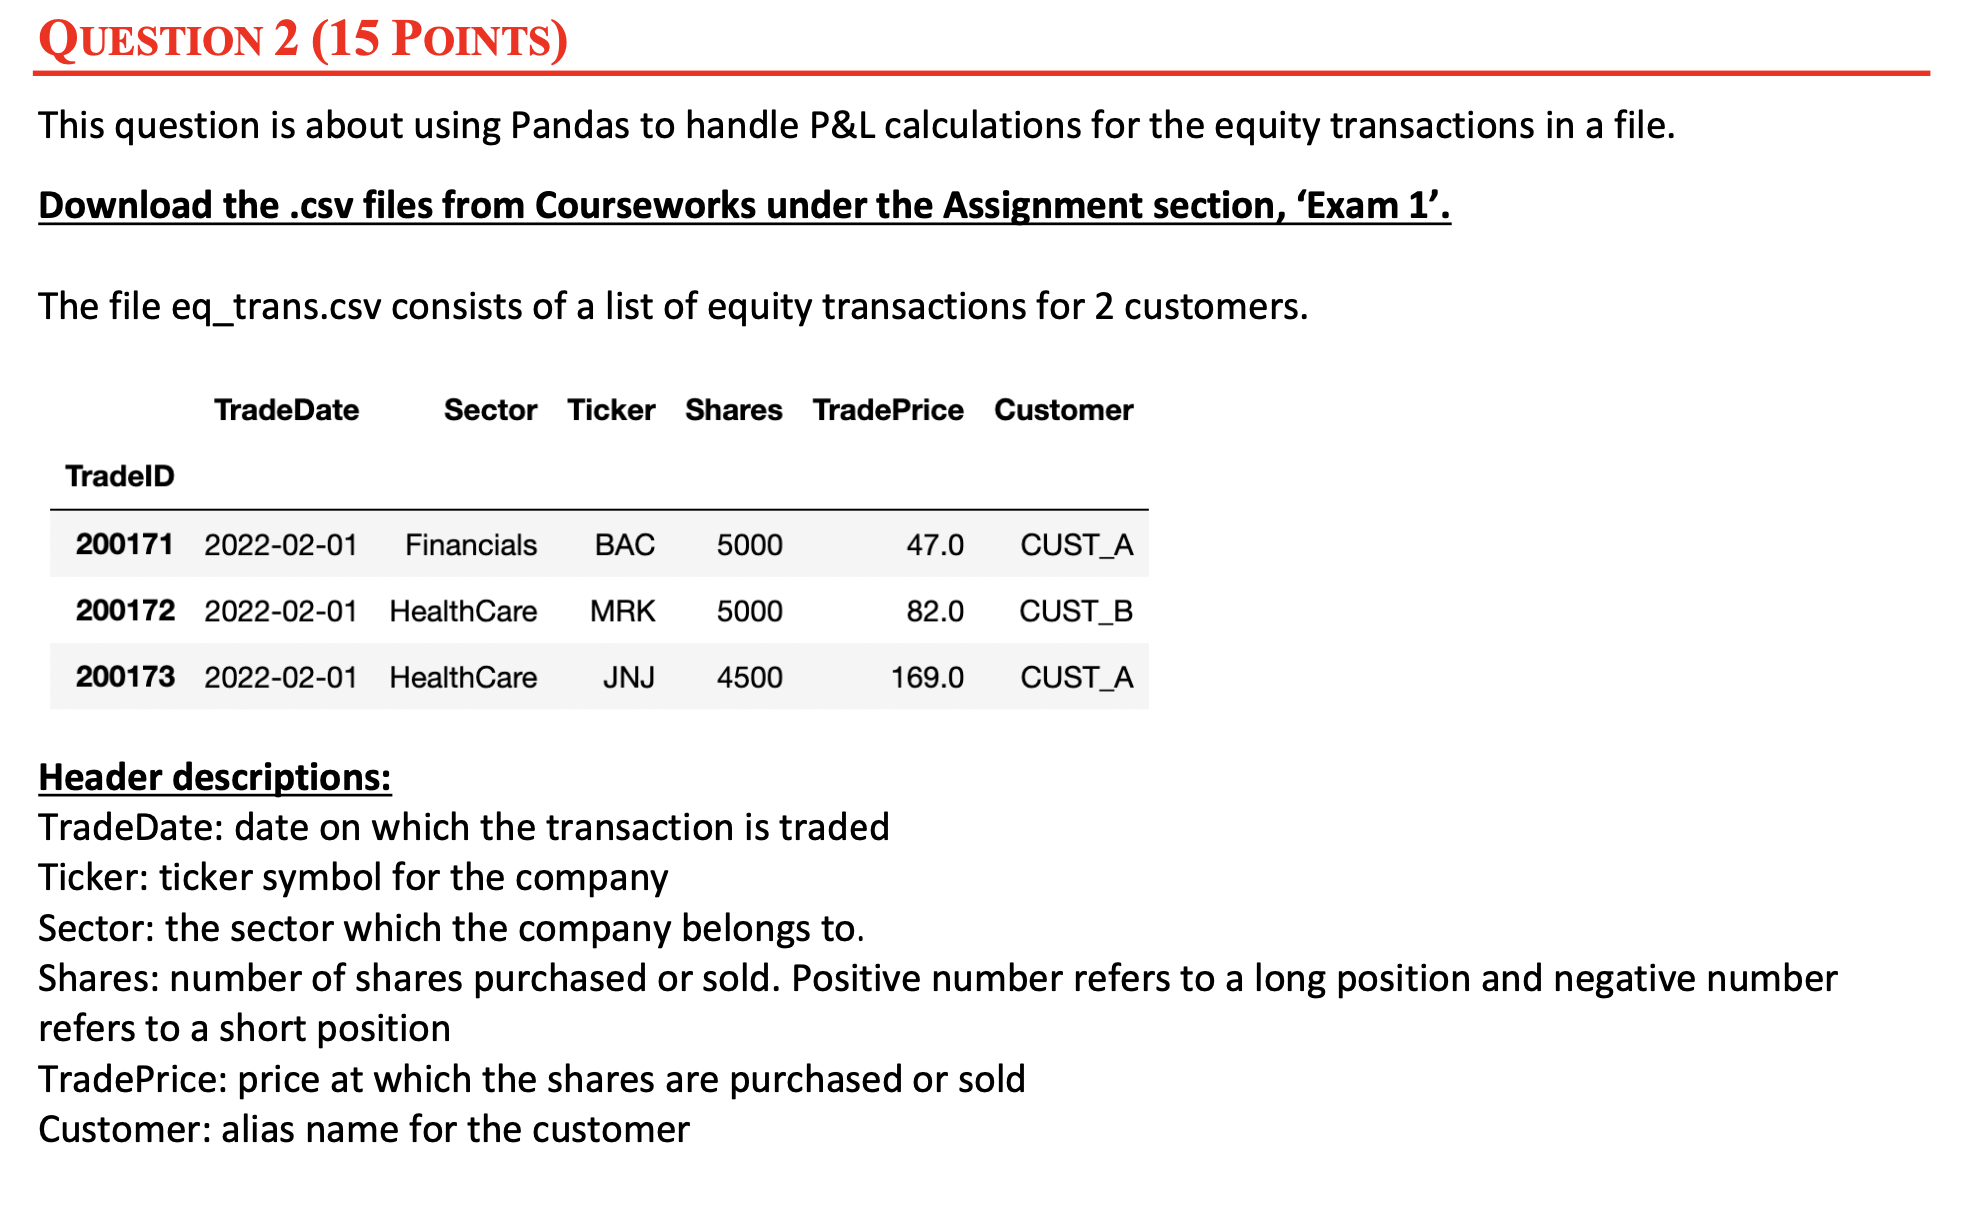

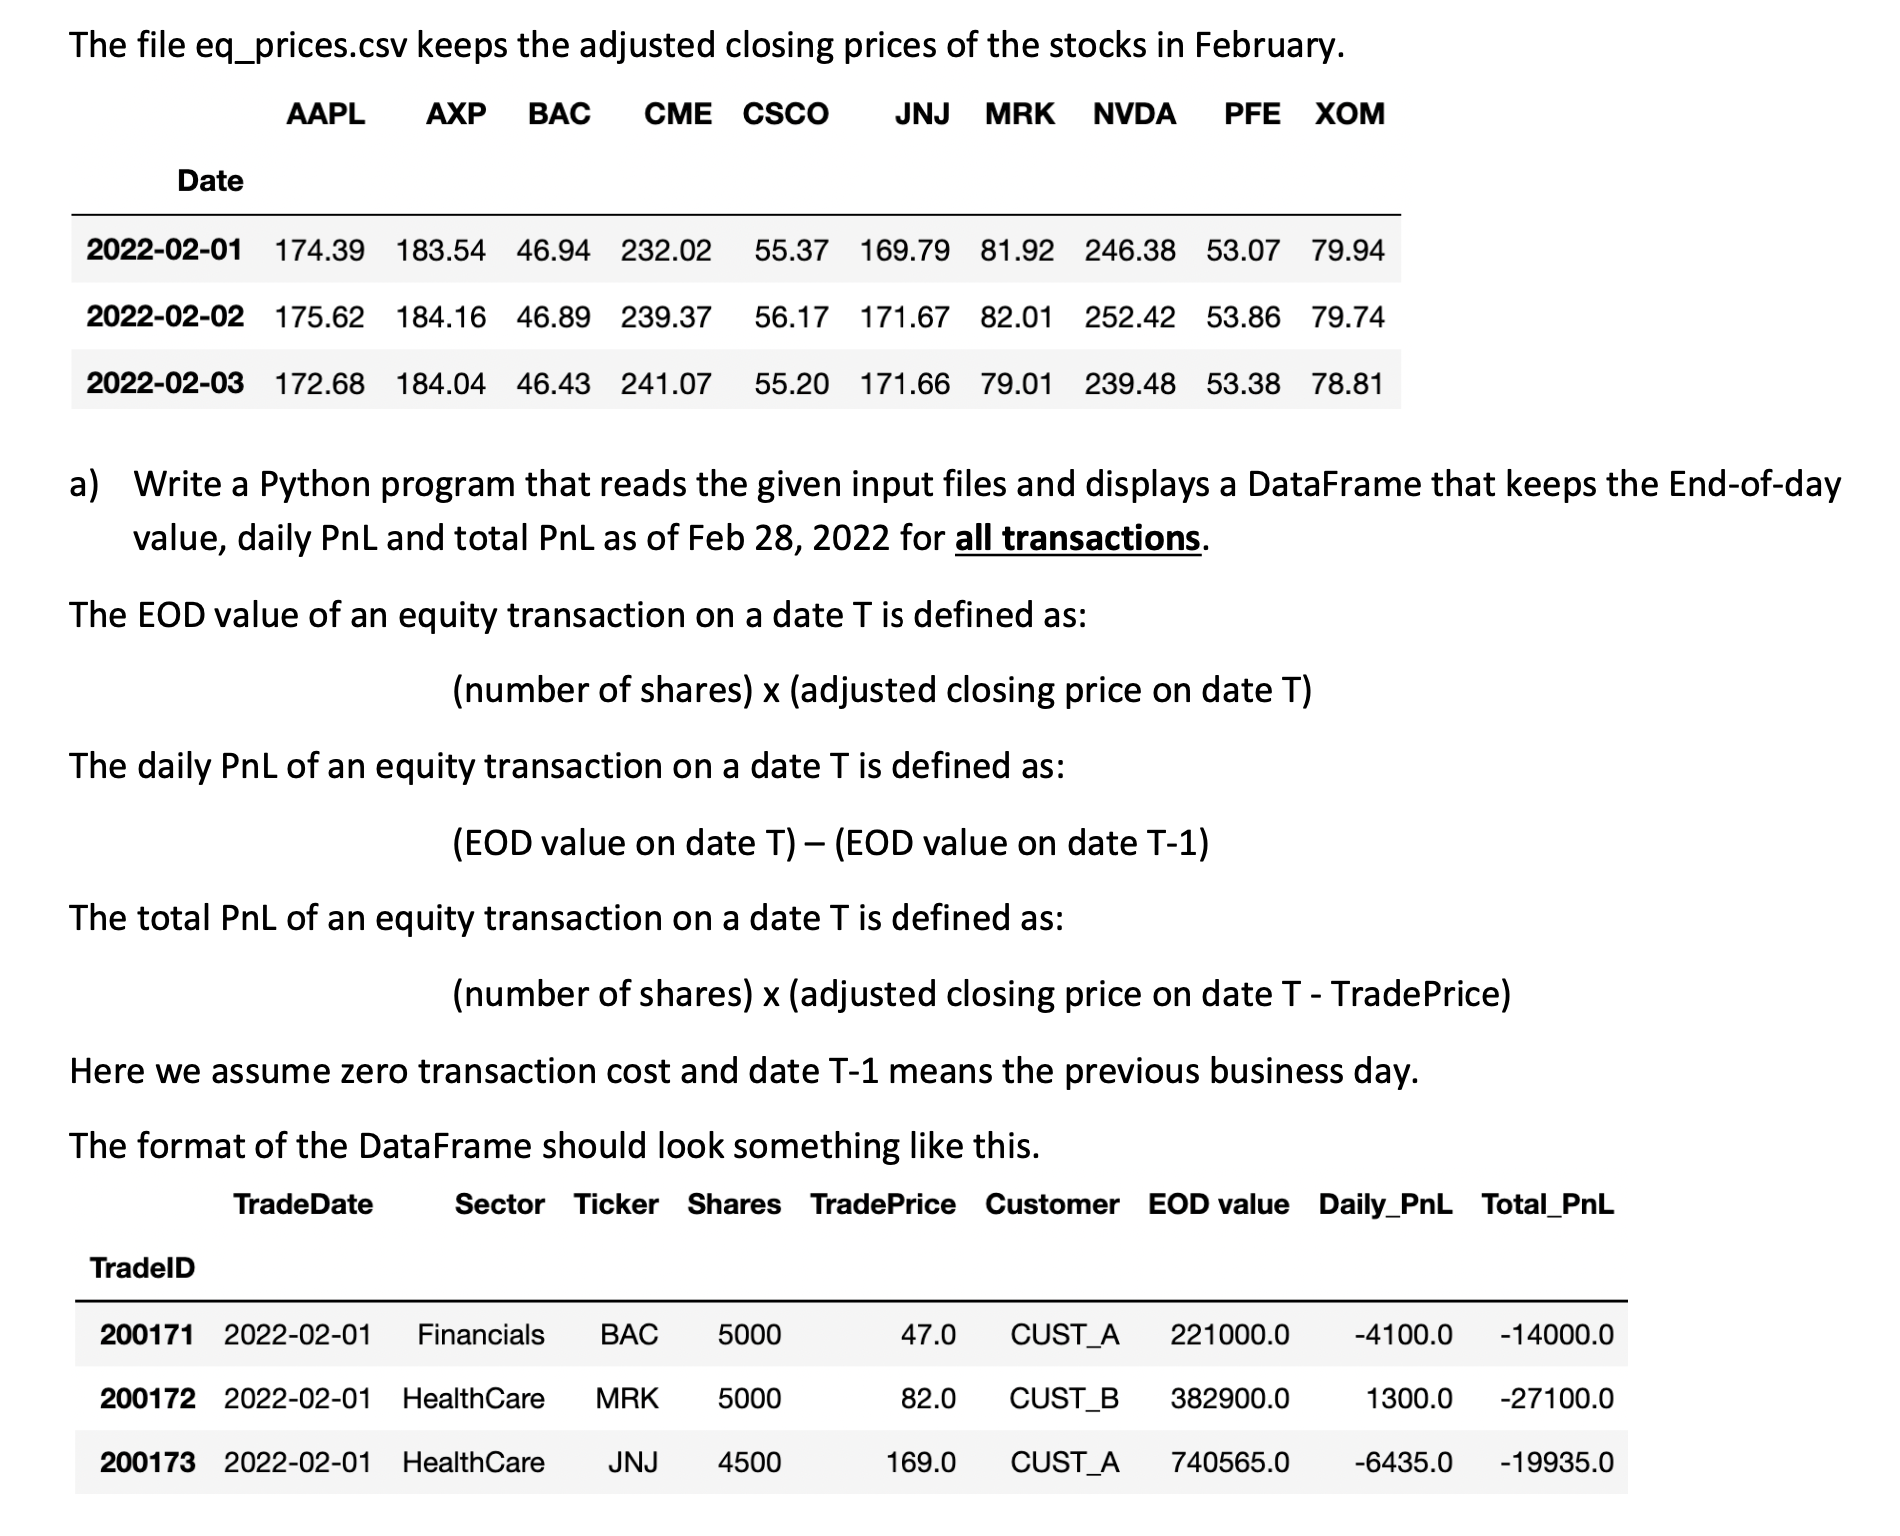

In [23]:
fileloc1 = "./eq_trans.csv"
fileloc2 = "./eq_prices.csv"
df = pd.read_csv(fileloc1, index_col = "TradeID")
prices = pd.read_csv(fileloc2, index_col = "Date", parse_dates = True)
df

,TradeDate,Sector,Ticker,Shares,TradePrice,Customer
TradeID,,,,,,
200171,2022-02-01,Financials,BAC,5000,47.0,CUST_A
200172,2022-02-01,HealthCare,MRK,5000,82.0,CUST_B
200173,2022-02-01,HealthCare,JNJ,4500,169.0,CUST_A
200174,2022-02-01,HealthCare,PFE,8000,53.0,CUST_A
200175,2022-02-03,Energy,XOM,6500,78.5,CUST_A
200176,2022-02-04,Financials,AXP,2500,185.0,CUST_A
200177,2022-02-07,IT,AAPL,1000,171.3,CUST_B
200178,2022-02-09,IT,AAPL,-300,176.0,CUST_B
200179,2022-02-10,HealthCare,PFE,-4000,51.0,CUST_A


In [20]:
n, k = len(df), len(prices)
s, s1 = np.zeros(n), np.zeros(n)
p = prices.loc["2022-02-25"]
p1 = prices.loc["2022-02-28"]
tickers = p.index
for i in range(n):
    for j in range(k):
        if tickers[j] == df.iloc[i, 2]:
            s[i] = p.iloc[j]
            s1[i] = p1.iloc[j]
            break;

In [21]:
df["EOD_value"] = df["Shares"] * s1
df["Daily_PnL"] = df["Shares"] * (s1 - s)
df["Total_PnL"] = df["Shares"] * (s1 - df["TradePrice"])

In [22]:
df

,TradeDate,Sector,Ticker,Shares,TradePrice,Customer,EOD_value,Daily_PnL,Total_PnL
TradeID,,,,,,,,,
200171,2022-02-01,Financials,BAC,5000,47.0,CUST_A,221000.0,-4100.0,-14000.0
200172,2022-02-01,HealthCare,MRK,5000,82.0,CUST_B,382900.0,1300.0,-27100.0
200173,2022-02-01,HealthCare,JNJ,4500,169.0,CUST_A,740565.0,-6435.0,-19935.0
200174,2022-02-01,HealthCare,PFE,8000,53.0,CUST_A,375520.0,-6240.0,-48480.0
200175,2022-02-03,Energy,XOM,6500,78.5,CUST_A,509730.0,3770.0,-520.0
200176,2022-02-04,Financials,AXP,2500,185.0,CUST_A,486350.0,2075.0,23850.0
200177,2022-02-07,IT,AAPL,1000,171.3,CUST_B,165120.0,270.0,-6180.0
200178,2022-02-09,IT,AAPL,-300,176.0,CUST_B,-49536.0,-81.0,3264.0
200179,2022-02-10,HealthCare,PFE,-4000,51.0,CUST_A,-187760.0,3120.0,16240.0


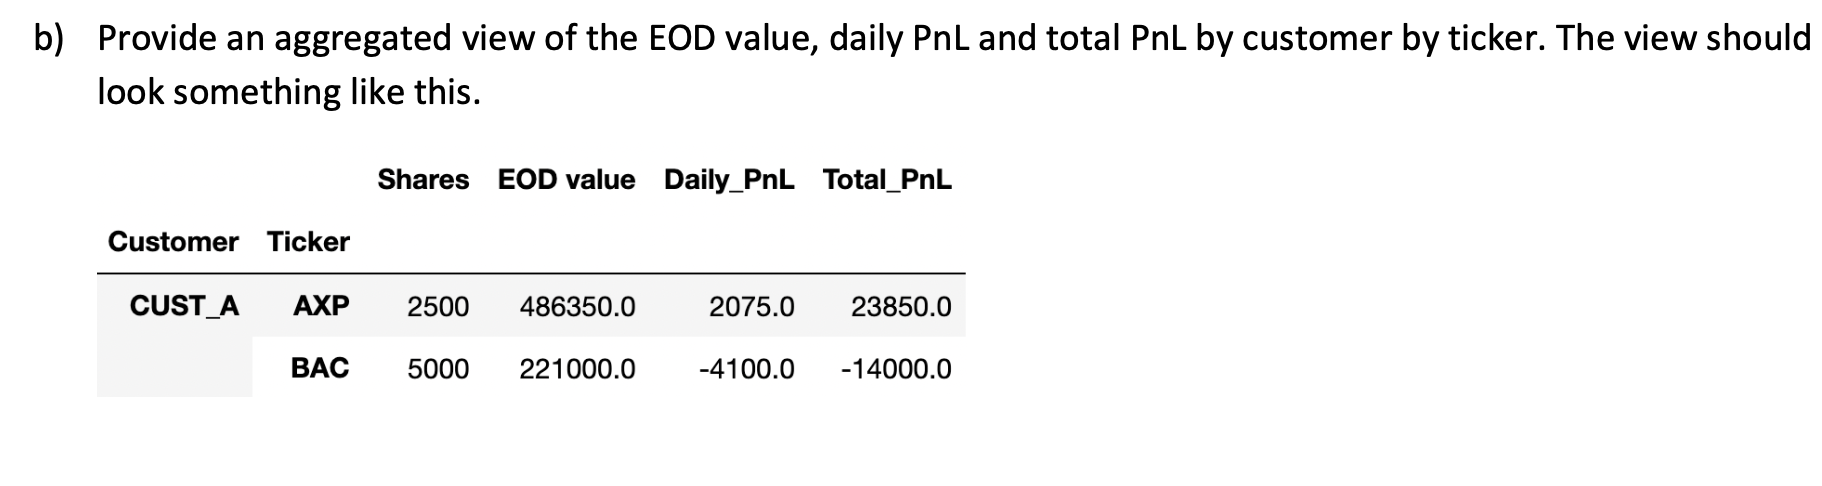

In [ ]:
g = df.drop("TradePrice", axis = 1).groupby(["Customer", "Ticker"])
g.sum()

Shares  EOD_value  Daily_PnL  Total_PnL
Customer Ticker                                         
CUST_A   AXP       2500   486350.0     2075.0    23850.0
         BAC       5000   221000.0    -4100.0   -14000.0
         CME       1000   236530.0    -2880.0    -2470.0
         JNJ       3500   575995.0    -5005.0   -19505.0
         MRK       2000   153160.0      520.0    -1240.0
         PFE       4000   187760.0    -3120.0   -32240.0
         XOM      11500   901830.0     6670.0     5580.0
CUST_B   AAPL       700   115584.0      189.0    -2916.0
         BAC       5500   243100.0    -4510.0   -20900.0
         CSCO      2800   156156.0     -756.0     -644.0
         MRK       5000   382900.0     1300.0   -27100.0
         NVDA      3500   853475.0     7980.0    54475.0
         PFE       4000   187760.0    -3120.0     -740.0

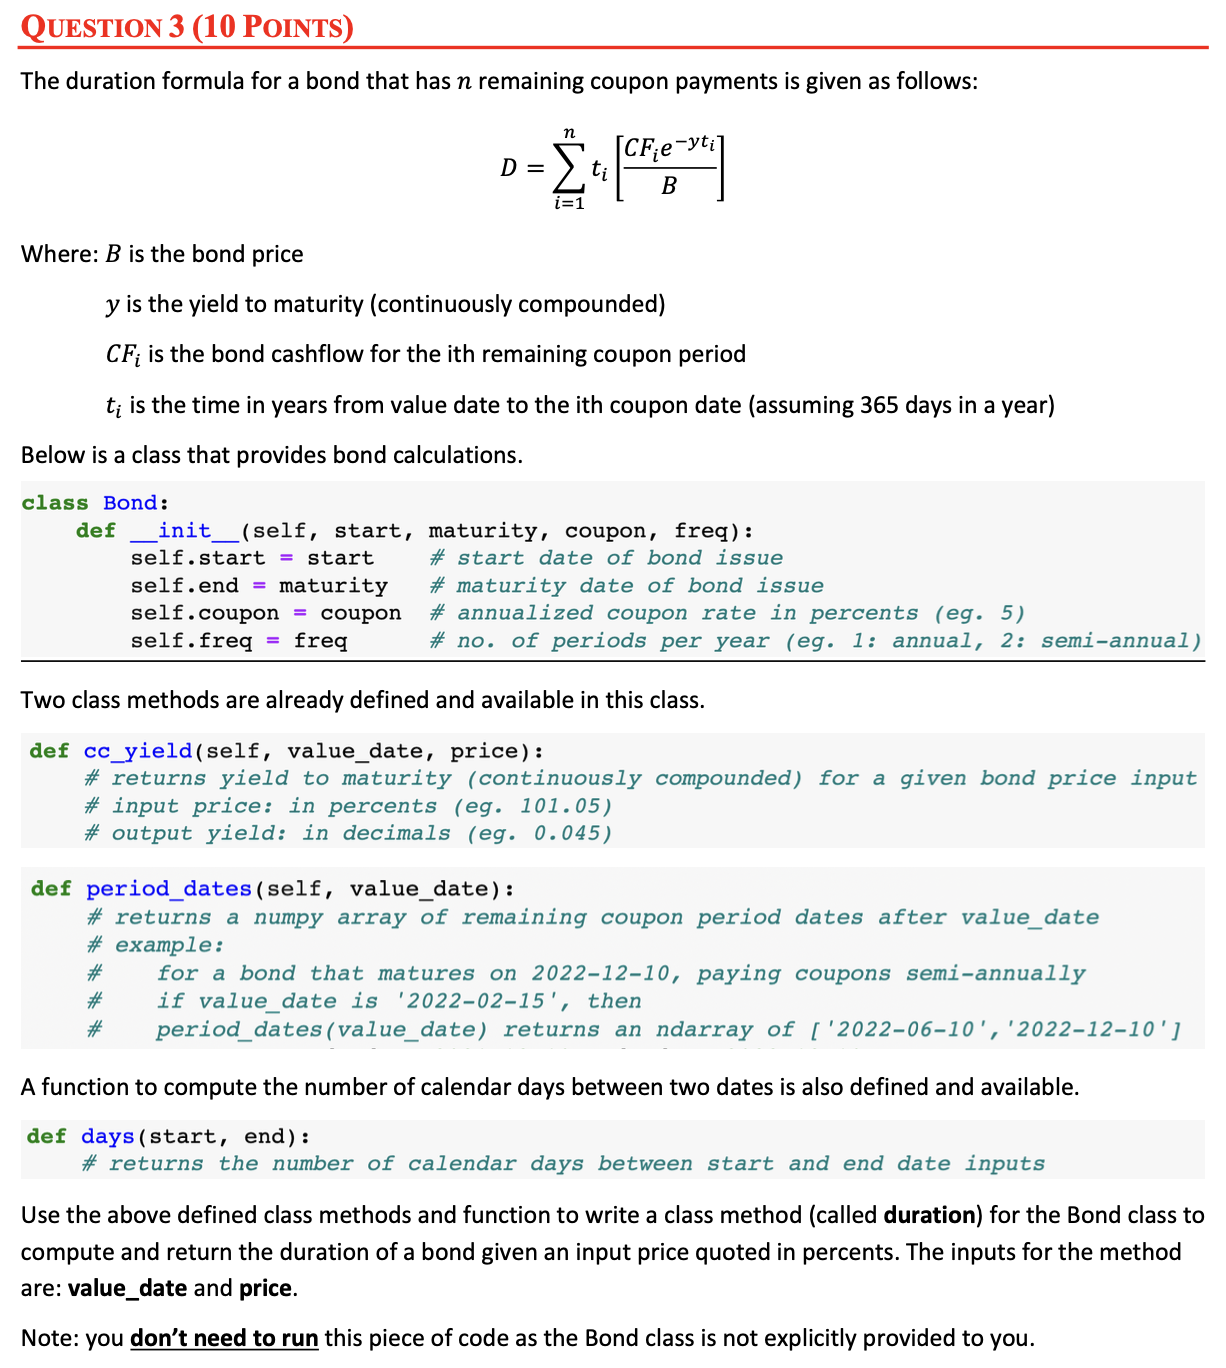

In [ ]:
"""
def duration(self, value_date, price):
    if price <= 1.0e-6:
        raise ValueError("Input price must be positive")
    dur = 0.0
    dts = self.period_dates(value_date)
    n = len(dts)
    if n > 0: # value_date < bond_maturity
        y = self.cc_yield(value_date, price)
        c = self.coupon/self.freq
        for i in range(0, n):
            t = days(value_date, dts[i])/365
            dur += t * c * np.exp(-y*t)
        dur += t * 100 * np.exp(-y*t)
        return dur/price
"""